# Packages needed
rpy2
numpy
pandas
tzlocal
simplegeneric

# Resources
Libraries:
* [Mockaroo](https://www.mockaroo.com/)
* [Python - Faker Documentation](https://faker.readthedocs.io/en/master/)
* [R - Synthpop Documentation](https://www.synthpop.org.uk/resources.html)
* [R - Synthpop Shiny App](https://synthpop.shinyapps.io/synthpop/)

Code Books:
* TBD - BINDER LINK
* TBD - RPUB LINK

NATSAL:
* [NATSAL](https://www.natsal.ac.uk/)
* [UKDS Open teaching dataset and data dictionaries](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8786) 
* [Codebook](http://doc.ukdataservice.ac.uk/doc/8786/mrdoc/pdf/8786_natsal_open_codebook_feb21.pdf)
* [Dataset Processing](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/NATSAL/NATSAL.ipynb)

# Introduction
In this Code Demo we will cover:
* TBD - Synthesizing random numbers for dice rolling
* Introducing the NATSAL dataset
* Introduction to Mockaroo
* Introduction to Faker
* Introduction to Synthpop

## Importing packages
To start with we need to import any packages beyond base Python we are using.
* Numpy - Support large multi-dimension arrays.
* Pandas - Pythons data manipulation library, built on top of numpy.
* Faker - Generates fake data.

In [59]:
import numpy as np
import pandas as pd
import faker

# NATSAL Data
NATSAL refers to the National Surveys of Sexual Attitudes and Lifestyles. 
[This](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8786) synthetic dataset holds some data on an individual-level identity, and opinions on various sexual topics.

Let's perform some EDA(Exploratory Data Analysis):
* Visually inspect rows.
* Assess the quality of our data.
* Begin to form a research questions.
* Look for ways to simplify this dataset for ourselves.

I've created a modification of the natsal data [here](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/NATSAL/natsal_3_teaching_open_with_personal.csv), with details on it's creation [here](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/NATSAL/NATSAL.ipynb).

Anyway lets get started.

In [22]:
# First we read in our dataset, we make use of Pandas here (pd), and read in our object as a dataframe (denoted df)
df = pd.read_csv('NATSAL/natsal_3_teaching_open_with_personal.csv')

# call the head function, listing 5 rows
df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,importance_religion,relationship_status,age_at_first_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media,has_child
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,Not very important,"Never married, or lived with partner and not i...",NaN,Not wrong at all,Agree,Agree,Agree,Agree,False
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,Not important at all,"Never married, or lived with partner and not i...",NaN,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree,False
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Fairly important,Living with partner,NaN,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly,False
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,Very important,In a steady & ongoing relationship but not li...,NaN,Always wrong,Agree,Agree,Disagree,Agree,False
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,Fairly important,"Never married, or lived with partner and not i...",NaN,Sometimes wrong,Agree,Disagree,Agree,Agree strongly,False


Do these rows make sense to us?

The names and e-mails seem to add up. There appears to be some missing data let's look into that a little more.

In [23]:
# df.info summarises some basic qualities of our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   first_name                     3799 non-null   object 
 1   last_name                      3799 non-null   object 
 2   email                          3703 non-null   object 
 3   age_group                      3799 non-null   object 
 4   sex                            3799 non-null   object 
 5   ethnic_group                   3799 non-null   object 
 6   sexual_identity                3799 non-null   object 
 7   importance_religion            3781 non-null   object 
 8   relationship_status            3708 non-null   object 
 9   age_at_first_child             1925 non-null   float64
 10  opp_one_night_stand_ok         3790 non-null   object 
 11  opp_sex_without_love_ok        3789 non-null   object 
 12  opp_pressure_to_have_sex       3790 non-null   o

Some notes here:
* we have 3799 rows, small enough that synthetsis could be manula, but also that machine learning may not perform well
* Most columns seem to have some missing data, age_at_first_child is mostly missing, but intentionally so.

In [24]:
# describe gives mathematical information, not too useful in this dataset but always a step I recommend.
df.describe()

,age_at_first_child
count,1925.000000
mean,24.841558
std,5.277274
min,15.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,40.000000


On average, respondants who had a first child, had them at 25 years old. 

Next I ask, what in here interests you? Can you draw out something you'd like to answer?
To me being able to visualize the difference of oppinion between males and females, those with and without children, different ethnicities and different age groups all look very exciting.

We have quite a lot of data that falls outside that scope, and I think it's worth dropping some. At this point i'd suggest:
* renaming variables that don't make sense to you, i've already done this renaming dage1ch to age_at_first_child so at a glance we can recognise this data.
* removing columns you aren't interested in.

In [29]:
df.columns

Index(['first_name', 'last_name', 'email', 'age_group', 'sex', 'ethnic_group',
       'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok',
       'opp_pressure_to_have_sex', 'opp_men_have_higher_sex_drive',
       'opp_too_much_sex_media'],
      dtype='object')

In [30]:
# select only columns we are interested in, I will drop the religion and age at first child
# Normally I would suggest redacting first_name, last_name and email at this point, but as an example we will keep them.
df = df[['first_name', 'last_name', 'email', 'age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']]

# If we want to rename any columns we can do so here.
df.columns = ['first_name', 'last_name', 'email','age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']

To clarify, what we are doing looks like redaction for disclosure control, we are dropping these columns becuase they currently don't add to our research.
The simpler our dataset the simpler our synthesis is likely to become.
If we were doing this for the sake of confidentiality it would be disclosure control.

In [27]:
df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


## Data Breakdown
So to break down our final dataset.
* first_name
* last_name
* email
* age_group - age group broken down into 9 year bands.
* sex - appears to contain only Male or Female
* ethnic_group - ethnic group, split as White or Not White
* sexual_identity - sexual identity as Heterosexual or Not Heterosexual
* relationship_status - relationship status
* has_child - True or False for having a child
* rwcasul - Now we are getting into some oppinion data, this is the opinion on one night stands.
* snnolov - Oppinion on sex, without love is ok.
* snpres - Oppinion on People are under pressure to have sex
* snsexdrv - Oppinion on Men have a nturally higher sex drive than women.
* snmedia - Oppinion on Too much sex in

## Visualizations
There won't be much value in trying to visualize the names and e-mails, but lets get a quick look at who our respondants are.

In [31]:
# we can count unique values using the value_counts() function.
df.age_group.value_counts()

25-34    1027
16-24     960
35-44     533
45-54     491
55-64     404
65-74     384
Name: age_group, dtype: int64

In [32]:
# which is less useful if we have a lot of different values.
df.first_name.value_counts()

Jermain    4
Katy       4
Rowan      4
Terri      4
Wolf       4
          ..
Antony     1
Brianne    1
Lonnie     1
Pincus     1
Gussie     1
Name: first_name, Length: 3026, dtype: int64

<AxesSubplot:>

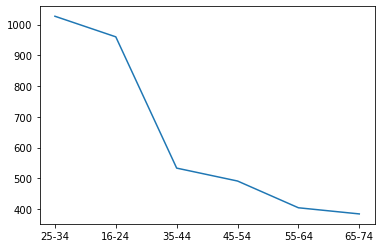

In [37]:
# We can also plot this object, calling .plot()
df.age_group.value_counts().plot()

<AxesSubplot:>

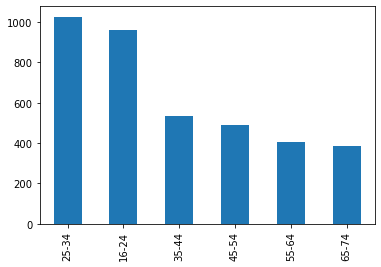

In [35]:
# .plot() assumes we want a line graph, this is not the case. We can control these plots using the kind parameter
df.age_group.value_counts().plot(kind='bar')

There are some problems here:
* This graph is small, probably hard to read
* Looks a bit dull
* the categories are clearly ordinal, that is 16-24 should probably be shown before 25-34 and so one
* missing titles and axis labels

We can configure matplotlib globally to resolve some of these for all future plots

In [70]:
# configure matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# set custom parameters
plt.rcParams.update({'font.size': 22,
                    'figure.figsize':(28,10)})
# plt.rcParams["figure.figsize"] = (20,3)

<AxesSubplot:>

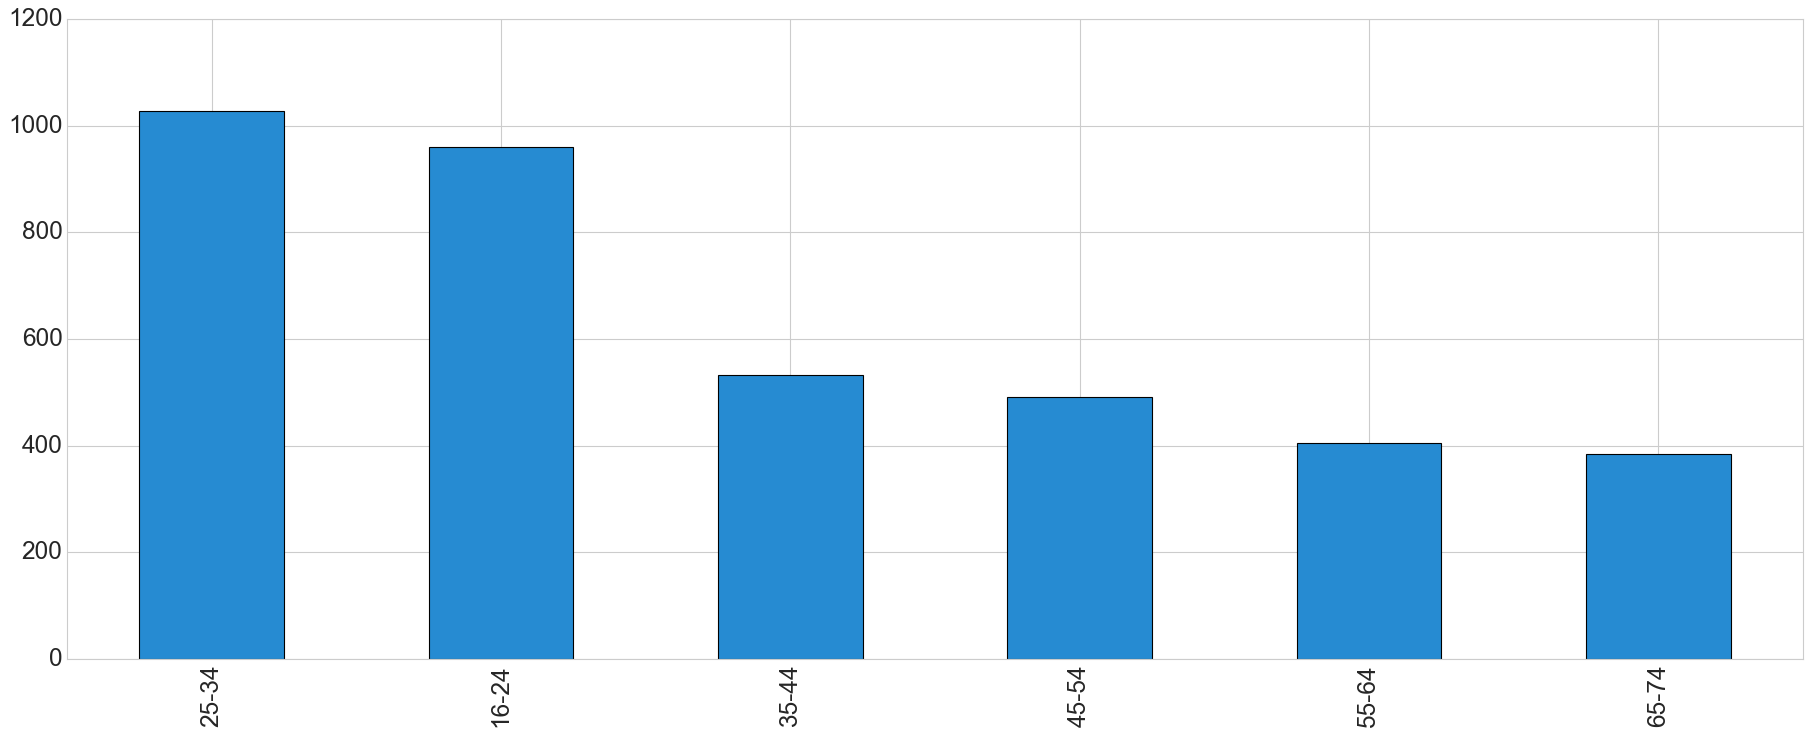

In [71]:
# .plot() assumes we want a line graph, this is not the case. We can control these plots using the kind parameter
df.age_group.value_counts().plot(kind='bar')